# Multi-linear Regression - Student Performance 

In [1]:
%cd C:/Users/shrav/Data_Analysis_Projects/Datasets/Multilinear Regression

C:\Users\shrav\Data_Analysis_Projects\Datasets\Multilinear Regression


In [2]:
# libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [3]:
# data 
df = pd.read_csv("Student_Performance.csv")
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


# Data Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [5]:
df.describe().round(2)

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.00,10000.00,10000.00,10000.00,10000.00
mean,4.99,69.45,6.53,4.58,55.22
std,2.59,17.34,1.70,2.87,19.21
min,1.00,40.00,4.00,0.00,10.00
25%,3.00,54.00,5.00,2.00,40.00
50%,5.00,69.00,7.00,5.00,55.00
75%,7.00,85.00,8.00,7.00,71.00
max,9.00,99.00,9.00,9.00,100.00


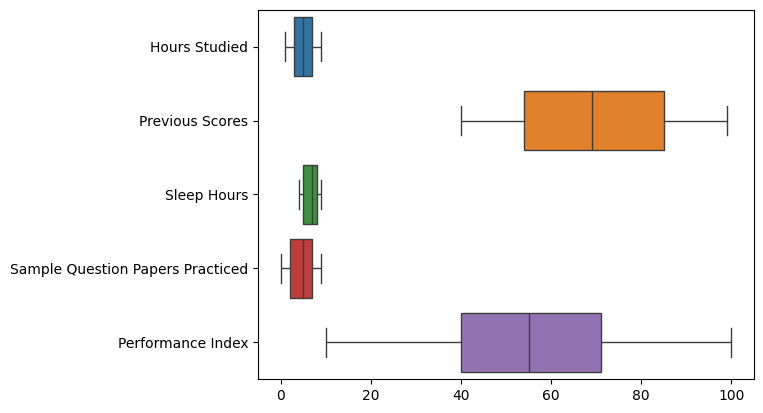

In [6]:
# Check for outliers

sns.boxplot(df, orient='h')
plt.show()

In [7]:
# add Performance Grade category column for visualization

def performance_mapper(n):
    if n >= 90:
        return "S"
    elif n >= 80:
        return "A"
    elif n >= 70:
        return "B"
    elif n >= 60:
        return "C"
    elif n >= 50:
        return "D"
    elif n >= 35:
        return "E"
    else:
        return "F"


df['Performance Grade'] = df["Performance Index"].apply(performance_mapper)

df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index,Performance Grade
0,7,99,Yes,9,1,91.0,S
1,4,82,No,4,2,65.0,C
2,8,51,Yes,7,2,45.0,E
3,5,52,Yes,5,2,36.0,E
4,7,75,No,8,5,66.0,C


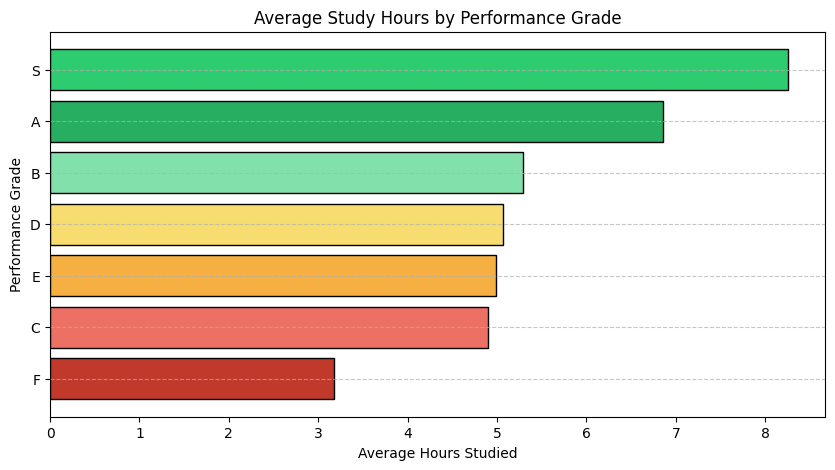

In [8]:
# Relationship between Hours Studied and Performance Grade

avg_study_hrs = df.groupby('Performance Grade', as_index=False)['Hours Studied'].mean()

# Sort grades by average study hours if needed (optional)
avg_study_hrs = avg_study_hrs.sort_values(by='Hours Studied', ascending=True)

# Plotting

grade_color_mapping = {
    'S': '#2ECC71',
    'A':  '#27AE60',
    'B':  '#82E0AA',
    'C':  '#EC7063',
    'D':  '#F7DC6F',
    'E':  '#F5B041',
    'F':  '#C0392B'
}

colors = avg_study_hrs['Performance Grade'].map(grade_color_mapping)

plt.figure(figsize=(10, 5))
plt.barh(avg_study_hrs['Performance Grade'], avg_study_hrs['Hours Studied'], color=colors, edgecolor='black')
plt.title('Average Study Hours by Performance Grade', fontsize=12)
plt.ylabel('Performance Grade', fontsize=10)
plt.xlabel('Average Hours Studied', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

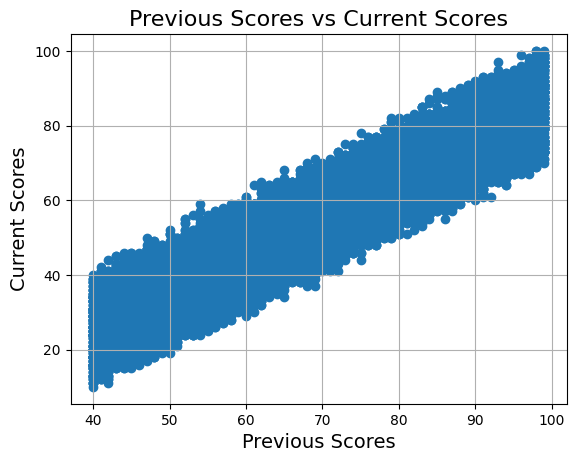

In [9]:
# Any relation between Previous Scores and Performance Index

plt.scatter(df['Previous Scores'], df['Performance Index'])
plt.title('Previous Scores vs Current Scores', fontsize=16)
plt.xlabel('Previous Scores', fontsize=14)
plt.ylabel('Current Scores', fontsize=14)
plt.grid(True)
plt.show()

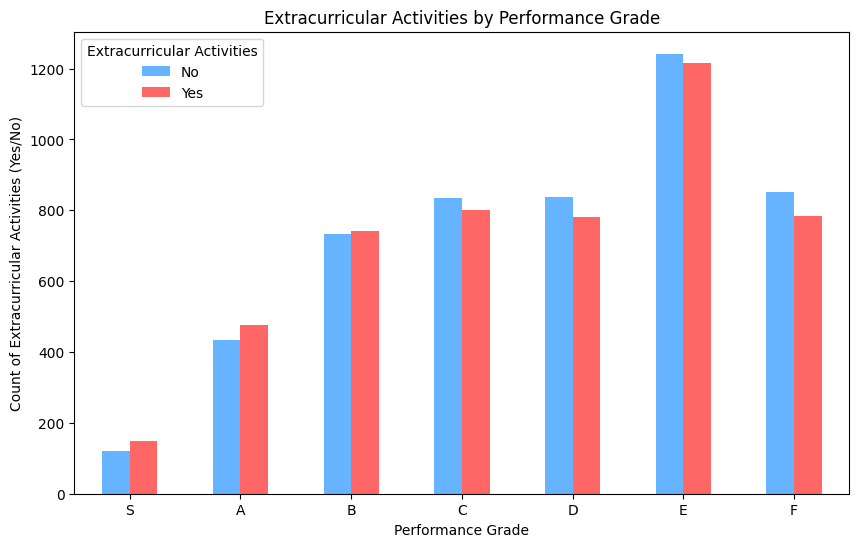

In [10]:
# Does participating in Extracurricular activities improve Performance Index?

# Group by 'Performance Grade' and count 'yes' and 'no' in 'Extracurricular Activities'
grade_order = ['S', 'A', 'B', 'C', 'D', 'E', 'F']
grouped = df.groupby(['Performance Grade', 'Extracurricular Activities']).size().unstack(fill_value=0)
grouped = grouped.reindex(grade_order, axis=0)
# Plotting
grouped.plot(kind='bar', figsize=(10, 6), color=['#66b3ff', '#ff6666'])

# Adding labels and title
plt.xlabel('Performance Grade')
plt.ylabel('Count of Extracurricular Activities (Yes/No)')
plt.title('Extracurricular Activities by Performance Grade')
plt.xticks(rotation=0)
plt.legend(title='Extracurricular Activities', labels=['No', 'Yes'])

# Display the plot
plt.show()

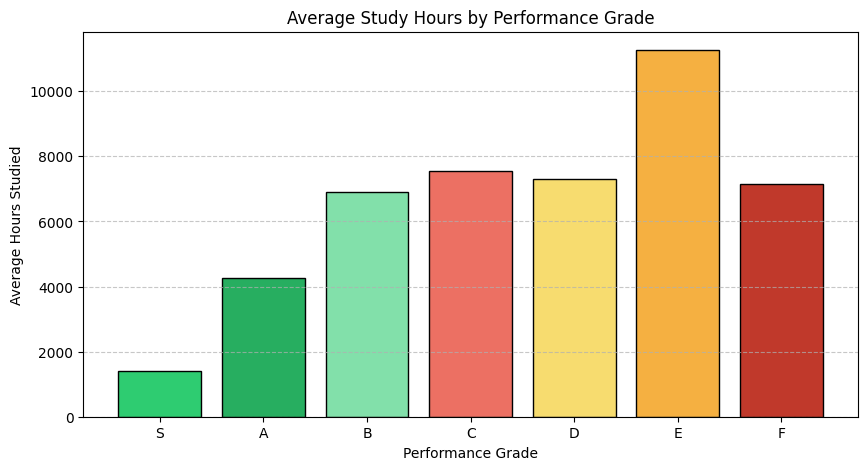

In [11]:
# Performance Grade vs Avg hours studied

question_paper_solved = df.groupby(by="Performance Grade", as_index=False)["Sample Question Papers Practiced"].sum()

question_paper_solved = question_paper_solved.set_index('Performance Grade').reindex(grade_order).reset_index()
colors = question_paper_solved['Performance Grade'].map(grade_color_mapping)

plt.figure(figsize=(10, 5))
plt.bar(question_paper_solved['Performance Grade'], question_paper_solved['Sample Question Papers Practiced'], color=colors, edgecolor='black')
plt.title('Average Study Hours by Performance Grade', fontsize=12)
plt.xlabel('Performance Grade', fontsize=10)
plt.ylabel('Average Hours Studied', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Check for correlation

<Axes: >

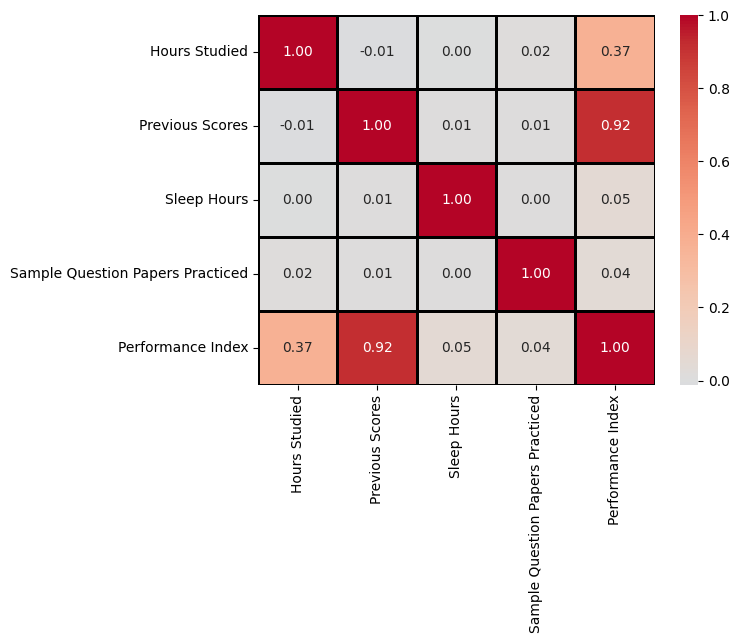

In [12]:
df = df.drop('Performance Grade', axis=1)
corr_df = df.drop('Extracurricular Activities', axis=1)

sns.heatmap(corr_df.corr(),
           annot=True,
           fmt='.2f',
           center=0,
           linecolor='black',
           linewidths=1,
           cmap='coolwarm')

**No outliers, no multi-colinearity.**

In [13]:
# convert categorical variables 

df = pd.get_dummies(df, drop_first=True, dtype=int)
df.head()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index,Extracurricular Activities_Yes
0,7,99,9,1,91.0,1
1,4,82,4,2,65.0,0
2,8,51,7,2,45.0,1
3,5,52,5,2,36.0,1
4,7,75,8,5,66.0,0


In [14]:
X = df.drop(columns=["Performance Index"])
y = df["Performance Index"]

# add constant
X = sm.add_constant(X)
X.head(1)

,const,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Extracurricular Activities_Yes
0,1.0,7,99,9,1,1


# Train and Test Split

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1506, test_size=0.20)

# Train the model

In [16]:
model = sm.OLS(y_train, X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      Performance Index   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                 1.404e+05
Date:                Mon, 28 Apr 2025   Prob (F-statistic):               0.00
Time:                        15:34:17   Log-Likelihood:                -17036.
No. Observations:                8000   AIC:                         3.408e+04
Df Residuals:                    7994   BIC:                         3.413e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

In [17]:
# Prediction
y_pred = model.predict(X_test)
y_pred[:4]

5121    84.272232
3718    64.687686
9272    76.389136
5086    63.194052
dtype: float64

In [18]:
# Important metrics
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1.6282521164170098
MSE: 4.19689660051369
RMSE: 2.048632861328181


# Residual Plot

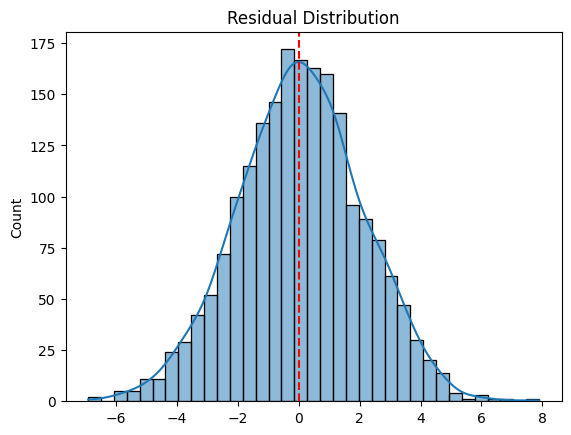

In [19]:
residuals = y_test - y_pred

sns.histplot(residuals, kde=True)
plt.title("Residual Distribution")
plt.axvline(x=0, color='red', linestyle='--')
plt.show()